In [1]:
import gensim
from gensim import matutils
import numpy as np
from numpy import dot
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load Google News word2vec model
google_model = gensim.models.Word2Vec.load_word2vec_format('../models/google-vectors.w2v'
                                                           ,binary=True)

In [3]:
# what do we know about this model?
vocab_size, dim = google_model.syn0.shape
print("vocab:", vocab_size)
print("depth:", dim)

vocab: 71291
depth: 200


In [ ]:
google_model.most_similar(positive=["beautiful","cute","tasteful","attractive"],
                          negative=["antlers","vile"],topn=50)

In [65]:
# extract sample set of terms
words = google_model.index2word[:200]
data = google_model.syn0[:200]

# add words of interest
aesthetic_terms = ["beautiful","cute","tasteful","attractive"]
for t in aesthetic_terms:
    words.append(t)
    data = np.vstack((data,google_model[t]))

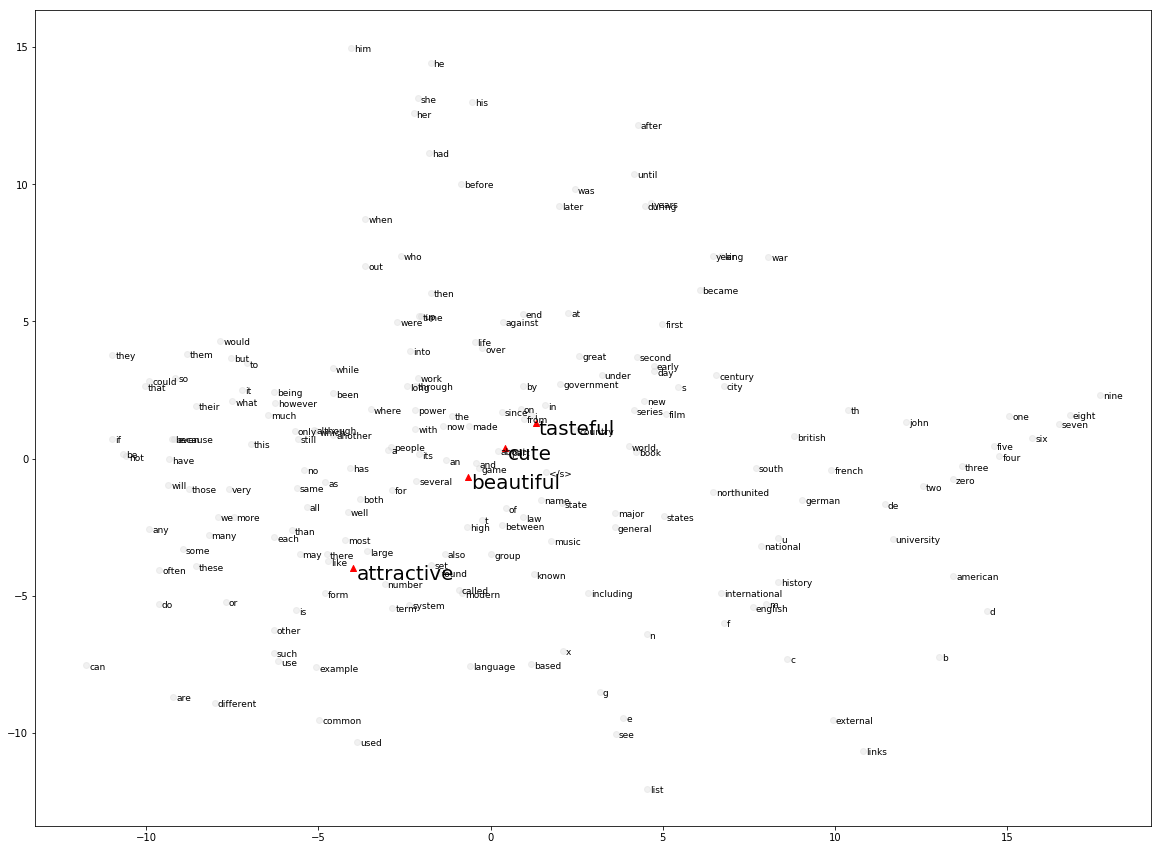

In [94]:
pca = PCA(n_components=2)
plot_data = pca.fit_transform(data)

lat = len(aesthetic_terms)

# "regular" words
xs = plot_data[:(len(plot_data) - lat), 0]
ys = plot_data[:(len(plot_data) - lat), 1]

# aesthetic words
axs = plot_data[-lat:, 0]
ays = plot_data[-lat:, 0]

fig = plt.figure(figsize=(20, 15))
plt.clf()

# regular words
plt.scatter(xs, ys, marker = 'o', c="lightgrey",alpha=0.3)

# aesthetic terms
plt.scatter(axs, ays, marker = '^', c="red")

for i, w in enumerate(words[:(len(plot_data) - lat)]):
    plt.annotate(w, xy = (xs[i], ys[i]), xytext = (3, 3),size=9,
                 textcoords = 'offset points', ha = 'left', va = 'top')
    
for i, w in enumerate(words[-lat:]):
    plt.annotate(w, xy = (axs[i], ays[i]), xytext = (3, 3),size=20,
                 textcoords = 'offset points', ha = 'left', va = 'top')